In [1]:
# Ch 5 Matrix
import numpy as np

In [2]:
MatrixA = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [3]:
MatrixA

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
MatrixB=np.array([[1,2],[3,4],[5,6],[7.8]])

In [5]:
MatrixB=np.array([[1,2],[3,4],[5,6],[7.8]])

In [6]:
MatrixC = np.ones([4,4], dtype=np.int32)

In [7]:
MatrixC

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

In [8]:
MatrixD = np.ones([4,4,4], dtype=np.bool)

In [9]:
MatrixD

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [10]:
MatrixE = np.mat([[1,2,3],[4,5,6],[7,8,9]])

In [11]:
MatrixE


matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [12]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6]])
print(a*b)

[[ 1  4  9]
 [16 25 36]]


In [13]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[3,4,5],[5,6,7]])
print(a.dot(b))

[[22 28 34]
 [49 64 79]]


In [14]:
changeIt = np.array([1,2,3,4,5,6,7,8])

print(changeIt)

print(changeIt.reshape(2,4))

print(changeIt.reshape(2,2,2))



[1 2 3 4 5 6 7 8]
[[1 2 3 4]
 [5 6 7 8]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [15]:
changeIt = np.array([[1,2,3,4],[5,6,7,8]])

print(np.transpose(changeIt))

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


In [16]:
print(np.identity(4))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
a = np.array([[1,2],[3,4]])
b = np.linalg.inv(a)

print(np.allclose(np.dot(a,b),np.identity(2)))


True


In [18]:
#Tensors
inputs = np.array([5,10,15])

In [19]:
weights = np.array([[.5,.2,-1],[.3,.4,.1],[-.2,.1,.3]])

In [20]:
result = np.dot(inputs,weights)
result

array([2.5, 6.5, 0.5])

In [21]:
def doAdd(a,b):
    return a+b
vectAdd = np.vectorize(doAdd)

print(vectAdd([1,2,3,4],[1,2,3,4]))

[2 4 6 8]


In [22]:

# Ch 6  Linear Regression
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
boston = load_boston()
X,y = scale(boston.data), boston.target


In [23]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print('R2 %0.3f' % regression.score(X,y))

R2 0.741


In [25]:
print([a + ':' + str(round(b,1)) for a, b in zip(boston.feature_names,regression.coef_)])


['CRIM:-0.9', 'ZN:1.1', 'INDUS:0.1', 'CHAS:0.7', 'NOX:-2.1', 'RM:2.7', 'AGE:0.0', 'DIS:-3.1', 'RAD:2.7', 'TAX:-2.1', 'PTRATIO:-2.1', 'B:0.8', 'LSTAT:-3.7']


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
enc = OneHotEncoder()
qualitative =['red','blue','green','red',
              'blue','green','red','blue']
labels = lbl.fit_transform(qualitative).reshape(8,1)
print(enc.fit_transform(labels).toarray())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X)
X_train, X_test, y_train, y_test =(train_test_split(poly_X, y, test_size = 0.33, random_state = 42))

from sklearn.linear_model import Ridge
reg_regression = Ridge(alpha=0.1, normalize=True)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' % r2_score(y_test, reg_regression.predict(X_test)))


R2: 0.820


In [28]:
import numpy as np

a = np.array([0,0,0,0,1,1,1,1])
b = np.array([1,2,3,4,5,6,7,8]).reshape(8,1)
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(b,a)
print(regression.predict(b)>0.5)

[False False False False  True  True  True  True]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size=0.33, random_state=5)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('In-sample accuracy: %0.3f' % accuracy_score(y_train,logistic.predict(X_train)))
print('Out-sample accuracy:%0.3f' % accuracy_score(y_test, logistic.predict(X_test)))


In-sample accuracy: 0.973
Out-sample accuracy:0.958


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
for var,coef in zip(boston.feature_names, logistic.coef_[0]):
    
        print('%7s: %7.3f' %(var,coef))

   CRIM:  -0.005
     ZN:   0.197
  INDUS:   0.580
   CHAS:  -0.023
    NOX:  -0.236
     RM:   1.426
    AGE:  -0.048
    DIS:  -0.365
    RAD:   0.645
    TAX:  -0.221
PTRATIO:  -0.554
      B:   0.049
  LSTAT:  -0.803


In [31]:
print('\nclasses:',logistic.classes_)
print('\nProbs:\n',logistic.predict_proba(X_test)[:3,:])
                                                


classes: [0 1]

Probs:
 [[0.39026273 0.60973727]
 [0.93857028 0.06142972]
 [0.98425591 0.01574409]]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
check =[2**i for i in range(8)]
for i in range(2**7+1):
    X_train = np.column_stack((X_train, np.random.random(X_train.shape[0])))
    X_test = np.column_stack((X_test, np.random.random(X_test.shape[0])))
    regression.fit(X_train, y_train)
    if i in check:
        print('Random features: %i -> R2: %0.3f' %(i, r2_score(y_train, regression.predict(X_train))))
        

Random features: 1 -> R2: 0.743
Random features: 2 -> R2: 0.743
Random features: 4 -> R2: 0.743
Random features: 8 -> R2: 0.747
Random features: 16 -> R2: 0.756
Random features: 32 -> R2: 0.767
Random features: 64 -> R2: 0.793
Random features: 128 -> R2: 0.857


In [33]:
regression.fit(X_train, y_train)
print('R2 %0.3f'
    % r2_score(y_test,regression.predict(X_test)))

R2 0.398


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import Ridge
reg_regression = Ridge(alpha=0.1, normalize=True)
reg_regression.fit(X_train, y_train)
print('R2:%0.3f' % r2_score(y_test, reg_regression.predict(X_test)))


R2:0.820


In [35]:
## Suppress Codes. Output a large file. Codes Work

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import SGDRegressor

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#SGD = SGDRegressor(penalty=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, max_iter=5, tol=None)
#power =17
#check = [2**i for i in range(power+1)]
#for i in range(400):
    #for j in range(X_train.shape[0]):
        #SGD.partial_fit(X_train[j,:].reshape(1,13),
                        #y_train[j].reshape(1,))
        #count = (j+1) + X_train.shape[0] + 1
        #if count in check:
            #R2 = r2_score(y_test, SGD.predict(X_test))
            #print('Eg %6i R2 %0.3f coef:%s' %(count, R2, ' '.join(map(lambda x:'%0.3f' %x, SGD.coef_))))
        

In [36]:
#Ch 8 - Neural Network
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [37]:
import matplotlib as plt
%matplotlib inline

def init(inp, out):
    return np.random.randn(inp, out)/np.sqrt(inp)
def creat_architecture(input_layer, first_layer, output_layer, random_seed=0):
    np.random.seed(random_seed)
    layers = X.shape[1], 3, 1
    arch = list(zip(layers[:1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    return weights

In [38]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_prime(s):
    return s + (1-s)

In [39]:
def feed_forward(X, weights):
    a = X.copy()
    out = list()
    for W in weights:
        z = np.dot(a,W)
        a = sigmoid(z)
        out.append(a)
    return out 


In [40]:
def accuracy(true_label, predicted):
    correct_preds = np.ravel(predicted)==true_label
    return np.sum(correct_preds)/len(true_label)

In [41]:
def backpropagation(l1, l2, weights, y):
    l2_error = y.reshape(-1, 1) - l2
    l2_delta = l2_error + sigmoid_prime(l2)
    l1_error = l2_delta.dot(weights[1].T)
    l1_delta = l1_error + sigmoid_prime(l1)
    return l2_error, l1_delta, l2_delta
    

In [42]:
def update_weights(X, l1, l1_delta, l2_delta, weights, alpha=1.0):
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))
    return weights 

In [43]:
def predict(X, weights):
    _, l2 = feed_forward(X, weights)
    preds = np.ravel((l2, 0.5).astype(int))
    return preds

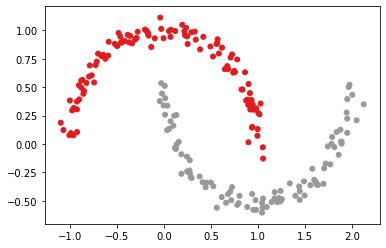

In [44]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
coord, c1 = make_moons(300, noise=0.05)
X, Xt, y, yt = train_test_split(coord, c1, test_size=0.30, random_state=0)

plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1)
plt.show()


In [23]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy

    

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
num_class = len(np.unique(y_train))
print(y_train[0], end=' => ')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)
print(y_train[0])

5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
# rescale 0-1 and cast training data as float32
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# reshape data to have also the channel dimension
img_rows, img_cols = X_train.shape[1:]
X_train = X_train.reshape(len(X_train), img_rows, img_cols, 1)
X_test = X_test.reshape(len(X_test), img_rows, img_cols, 1)

# notice the input shape
input_shape = (img_rows, img_cols, 1)
print(input_shape)


(28, 28, 1)


In [27]:
lenet = Sequential()

# Convolutional Layer C1
lenet.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', 
                 input_shape=input_shape, padding='same', name='C1'))

# Pooling Layer S2
lenet.add(AveragePooling2D(pool_size=(2, 2), name='S2'))

# Convolutional Layer C3
lenet.add(Conv2D(16, kernel_size=(5, 5), activation='tanh', name='C3'))

# Pooling Layer S4
lenet.add(AveragePooling2D(pool_size=(2, 2), name='S4'))

# Fully Connected Convolutional Layer C5
lenet.add(Conv2D(120, kernel_size=(5, 5), activation='tanh', name='C5'))

# Fully Connected Layer FC6
lenet.add(Flatten())
lenet.add(Dense(84, activation='tanh', name='FC6'))

#Output Layer (softmax activation)
lenet.add(Dense(10, activation='softmax', name='OUTPUT'))

In [28]:
lenet.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)                10164     
__________

In [29]:
batch_size = 64
epochs = 50
history = lenet.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, 
                                       y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 50s 838us/step - loss: 0.8928 - acc: 0.7870 - val_loss: 0.3963 - val_acc: 0.8964
Epoch 2/50
60000/60000 [==============================] - 49s 816us/step - loss: 0.3506 - acc: 0.9025 - val_loss: 0.2915 - val_acc: 0.9183
Epoch 3/50
60000/60000 [==============================] - 49s 815us/step - loss: 0.2802 - acc: 0.9185 - val_loss: 0.2422 - val_acc: 0.9280
Epoch 4/50
60000/60000 [==============================] - 47s 791us/step - loss: 0.2382 - acc: 0.9296 - val_loss: 0.2088 - val_acc: 0.9385
Epoch 5/50
60000/60000 [==============================] - 50s 833us/step - loss: 0.2068 - acc: 0.9383 - val_loss: 0.1809 - val_acc: 0.9453
Epoch 6/50
60000/60000 [==============================] - 49s 821us/step - loss: 0.1821 - acc: 0.9461 - val_loss: 0.1600 - val_acc: 0.9539
Epoch 7/50
60000/60000 [==============================] - 50s 831us/step - loss: 0.1617 - acc: 0.9523 - val_loss: 0.